In [1]:
import pandas as pd
from my_utils2 import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [3]:
conn = connect_mysql()
query = 'select * from lol_datas'
df = pd.DataFrame(sql_execute_dict(conn, query))
conn.close()

In [5]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [6]:
tmp = df[['teamPosition', 'totalDamageDealtToChampions', 'totalDamageTaken', 'g_15']]

In [8]:
tmp = tmp[tmp.teamPosition != '']

In [9]:
tmp

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
0,TOP,16199,12908,6212
1,JUNGLE,12057,16026,6931
2,MIDDLE,11248,11933,5674
3,BOTTOM,12248,6739,6182
4,UTILITY,4006,9176,4731
...,...,...,...,...
36899,TOP,11161,22494,5140
36900,JUNGLE,16255,21327,6123
36901,MIDDLE,9923,18363,5094
36902,BOTTOM,25928,16667,6591


In [15]:
group_df = tmp.groupby('teamPosition').mean().round()

In [18]:
group_df.loc['BOTTOM']

totalDamageDealtToChampions    20975.0
totalDamageTaken               18361.0
g_15                            6006.0
Name: BOTTOM, dtype: float64

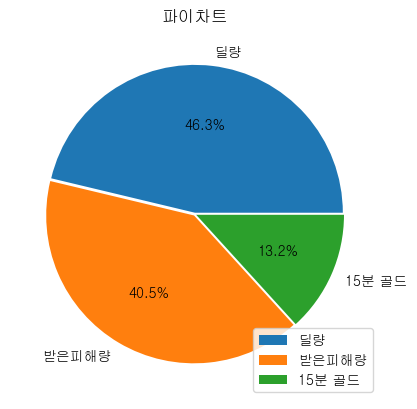

In [35]:
plt.figure()
plt.pie(group_df.loc['BOTTOM'], labels = ['딜량', '받은피해량', '15분 골드'], shadow=False, autopct='%1.1f%%',
       explode = (0.01, 0.01, 0.01))
plt.legend(loc = 4)
plt.title('파이차트')
plt.grid(True)

In [36]:
my_tmp = tmp[['teamPosition', 'totalDamageDealtToChampions']]

In [43]:
my_tmp.set_index('teamPosition', inplace = True)

In [44]:
my_tmp

,totalDamageDealtToChampions
teamPosition,
TOP,16199
JUNGLE,12057
MIDDLE,11248
BOTTOM,12248
UTILITY,4006
...,...
TOP,11161
JUNGLE,16255
MIDDLE,9923


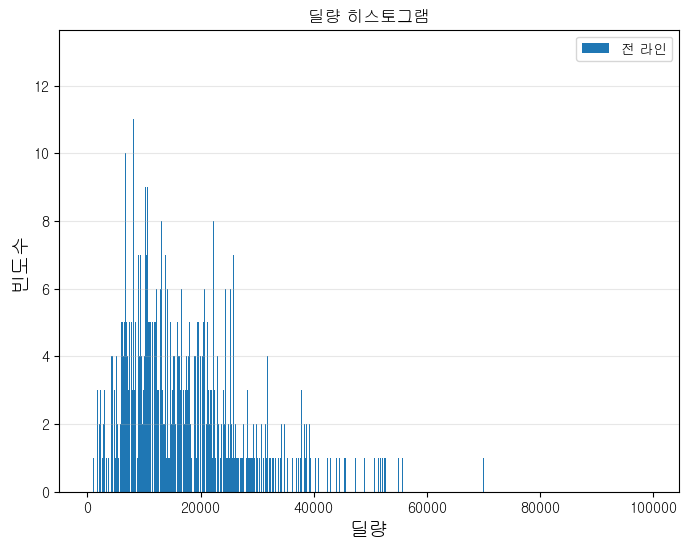

In [47]:
plt.figure(figsize = (8, 6))
plt.hist(my_tmp, bins = len(my_tmp), label = '전 라인', rwidth = 0.9)

plt.xlabel ('딜량', size = 14)
plt.ylabel ('빈도수', size = 14)
plt.title('딜량 히스토그램')
plt.legend(loc = 'upper right')
plt.grid(axis = 'y', alpha = 0.3)

In [46]:
import seaborn as sns

In [49]:
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/GetParkInfo/1/5/'

In [50]:
df = get_df(url)

In [52]:
df.columns

Index(['PARKING_NAME', 'ADDR', 'PARKING_CODE', 'PARKING_TYPE',
       'PARKING_TYPE_NM', 'OPERATION_RULE', 'OPERATION_RULE_NM', 'TEL',
       'QUE_STATUS', 'QUE_STATUS_NM', 'CAPACITY', 'PAY_YN', 'PAY_NM',
       'NIGHT_FREE_OPEN', 'NIGHT_FREE_OPEN_NM', 'WEEKDAY_BEGIN_TIME',
       'WEEKDAY_END_TIME', 'WEEKEND_BEGIN_TIME', 'WEEKEND_END_TIME',
       'HOLIDAY_BEGIN_TIME', 'HOLIDAY_END_TIME', 'SYNC_TIME',
       'SATURDAY_PAY_YN', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_YN',
       'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'GRP_PARKNM', 'RATES',
       'TIME_RATE', 'ADD_RATES', 'ADD_TIME_RATE', 'BUS_RATES', 'BUS_TIME_RATE',
       'BUS_ADD_TIME_RATE', 'BUS_ADD_RATES', 'DAY_MAXIMUM', 'LAT', 'LNG'],
      dtype='object')

In [53]:
tmp = df[['PARKING_NAME', 'CAPACITY', 'PAY_NM', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'RATES', 'ADD_RATES']]

In [55]:
tmp.columns = ['주차장명','주차수','유무료','주말유무료','공휴일유무료',
                 '월정기권금액','기본요금','추가요금']

In [57]:
tmp = tmp.drop_duplicates()

In [58]:
tmp

,주차장명,주차수,유무료,주말유무료,공휴일유무료,월정기권금액,기본요금,추가요금
0,초안산근린공원주차장(구),71.0,유료,무료,무료,0,0.0,300.0
1,마들스타디움(근린공원)(구),177.0,유료,무료,무료,100000,150.0,150.0
2,마장동(건물) 공영주차장(구),54.0,유료,무료,무료,50000,50.0,50.0
3,영등포여고 공영(구),98.0,유료,무료,무료,65000,50.0,50.0
4,당산근린공원 공영(구),190.0,유료,무료,무료,100000,150.0,150.0
...,...,...,...,...,...,...,...,...
965,태화관(구),1.0,유료,무료,유료,250000,500.0,1000.0
966,동일상가아파트 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
974,숭인상가아파트 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
980,필운대로 도미노피자앞 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0


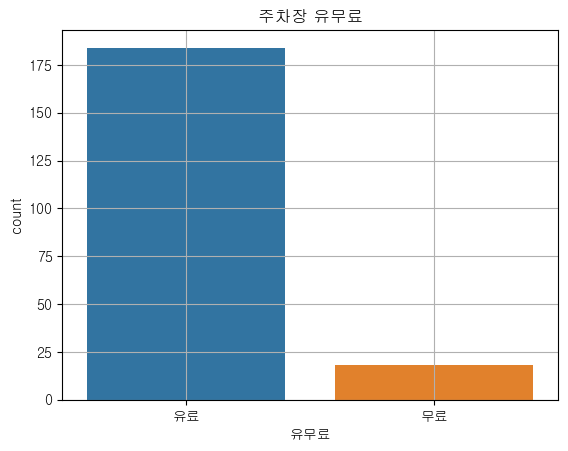

In [60]:
plt.figure()
plt.title('주차장 유무료')
sns.countplot(x = '유무료', data = tmp, order = ['유료', '무료'])
plt.grid()

<Axes: title={'center': '기본요금 히스토그램'}, xlabel='기본요금', ylabel='Count'>

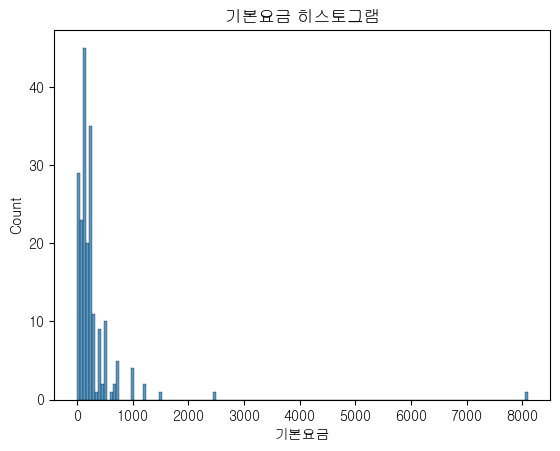

In [61]:
plt.figure()
plt.title('기본요금 히스토그램')
sns.histplot(x = tmp['기본요금'])

<Axes: xlabel='기본요금', ylabel='추가요금'>

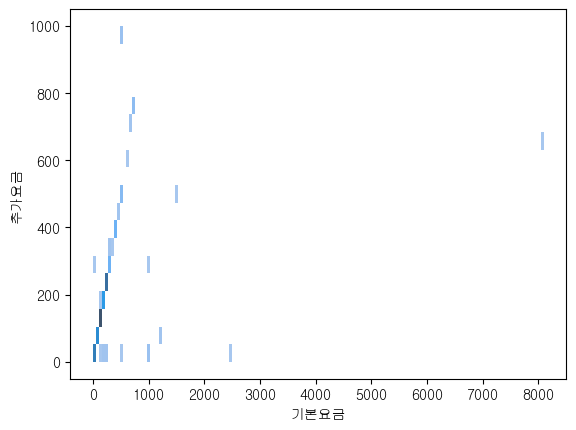

In [64]:
sns.histplot(x = tmp['기본요금'], y = tmp['추가요금'])

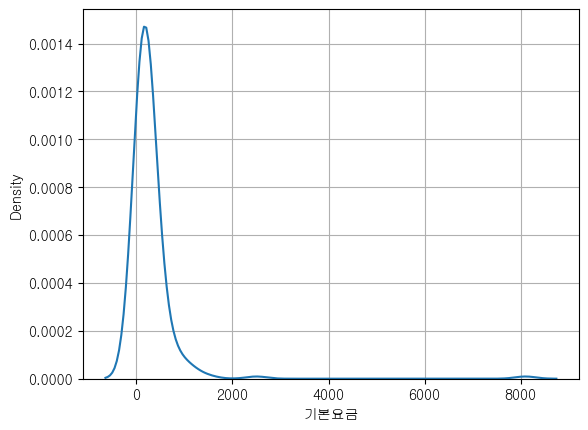

In [66]:
plt.figure()
sns.kdeplot(x = tmp ['기본요금'])
plt.grid()

In [67]:
conn = connect_mysql()
query = 'select * from lol_datas'
lol_df = pd.DataFrame(sql_execute_dict(conn, query))

# 포지션중 하나를 선택해서 15분 골드와 20분 골드를 kdeplot으로 만들어보기

In [69]:
lol_df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [107]:
lol_tmp = lol_df[['teamPosition', 'g_15', 'g_20']]

In [108]:
lol_tmp = lol_tmp[lol_tmp.teamPosition != '']

In [110]:
ut_tmp = lol_tmp[lol_tmp.teamPosition == 'UTILITY']

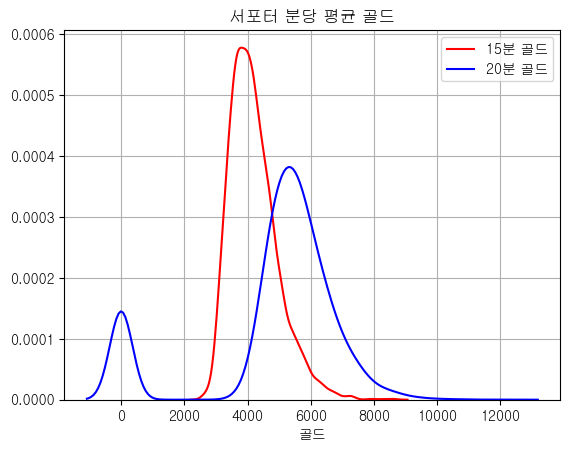

In [133]:
sns.kdeplot(x = ut_tmp ['g_15'], color = 'r', label = '15분 골드')
sns.kdeplot(x = ut_tmp ['g_20'], color = 'b', label = '20분 골드')
plt.xlabel('골드')
plt.ylabel('')
plt.title('서포터 분당 평균 골드')
plt.legend(loc = 1)

plt.grid()

In [156]:
import seaborn as sns

In [157]:
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/GetParkInfo/1/5/'

In [158]:
df = get_df(url)

In [159]:
df.columns

Index(['PARKING_NAME', 'ADDR', 'PARKING_CODE', 'PARKING_TYPE',
       'PARKING_TYPE_NM', 'OPERATION_RULE', 'OPERATION_RULE_NM', 'TEL',
       'QUE_STATUS', 'QUE_STATUS_NM', 'CAPACITY', 'PAY_YN', 'PAY_NM',
       'NIGHT_FREE_OPEN', 'NIGHT_FREE_OPEN_NM', 'WEEKDAY_BEGIN_TIME',
       'WEEKDAY_END_TIME', 'WEEKEND_BEGIN_TIME', 'WEEKEND_END_TIME',
       'HOLIDAY_BEGIN_TIME', 'HOLIDAY_END_TIME', 'SYNC_TIME',
       'SATURDAY_PAY_YN', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_YN',
       'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'GRP_PARKNM', 'RATES',
       'TIME_RATE', 'ADD_RATES', 'ADD_TIME_RATE', 'BUS_RATES', 'BUS_TIME_RATE',
       'BUS_ADD_TIME_RATE', 'BUS_ADD_RATES', 'DAY_MAXIMUM', 'LAT', 'LNG'],
      dtype='object')

In [160]:
tmp = df[['PARKING_NAME', 'CAPACITY', 'PAY_NM', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'RATES', 'ADD_RATES']]

In [161]:
tmp = tmp.drop_duplicates()

In [162]:
tmp.columns = ['주차장명','주차수','유무료','주말유무료','공휴일유무료',
                 '월정기권금액','기본요금','추가요금']

In [163]:
tmp

,주차장명,주차수,유무료,주말유무료,공휴일유무료,월정기권금액,기본요금,추가요금
0,초안산근린공원주차장(구),71.0,유료,무료,무료,0,0.0,300.0
1,마들스타디움(근린공원)(구),177.0,유료,무료,무료,100000,150.0,150.0
2,마장동(건물) 공영주차장(구),54.0,유료,무료,무료,50000,50.0,50.0
3,영등포여고 공영(구),98.0,유료,무료,무료,65000,50.0,50.0
4,당산근린공원 공영(구),190.0,유료,무료,무료,100000,150.0,150.0
...,...,...,...,...,...,...,...,...
965,태화관(구),1.0,유료,무료,유료,250000,500.0,1000.0
966,동일상가아파트 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
974,숭인상가아파트 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
980,필운대로 도미노피자앞 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0


C:\Users\qkrdy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


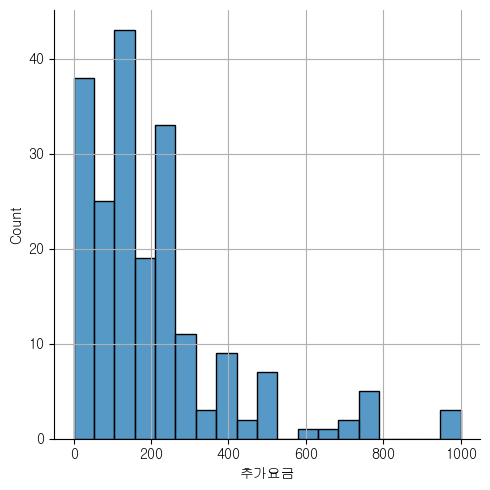

In [164]:
sns.displot(x = tmp['추가요금'])
# ,kind = 'ecdf'
plt.grid()

<Axes: xlabel='추가요금', ylabel='Density'>

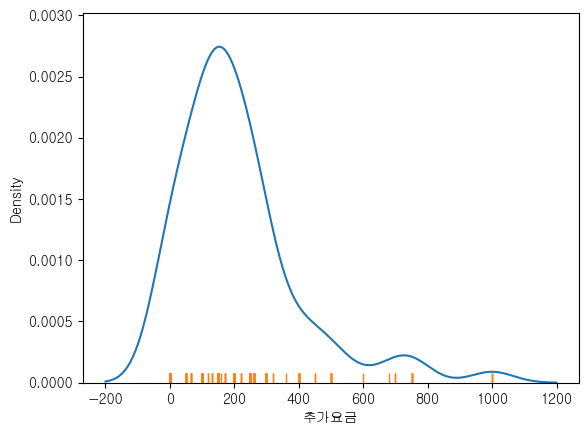

In [165]:
sns.kdeplot(x = tmp['추가요금'])
sns.rugplot(x = tmp['추가요금'])

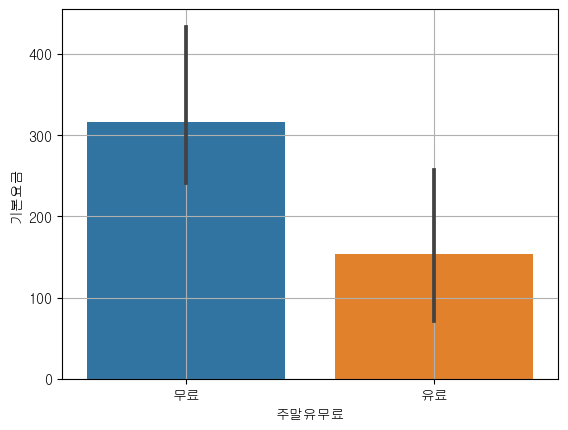

In [167]:
sns.barplot(x = tmp['주말유무료'], y = tmp['기본요금'])
plt.grid()

<Axes: xlabel='주말유무료', ylabel='count'>

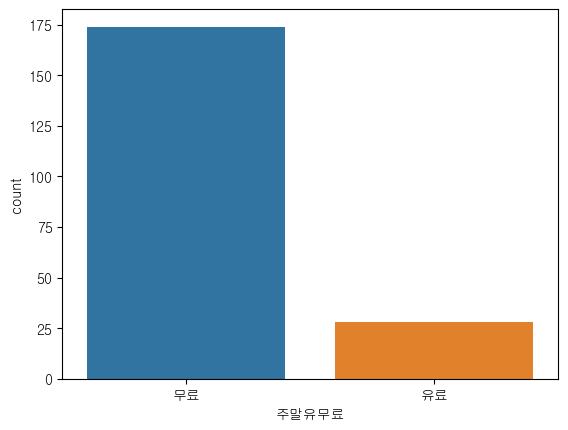

In [168]:
sns.countplot(x = tmp['주말유무료'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

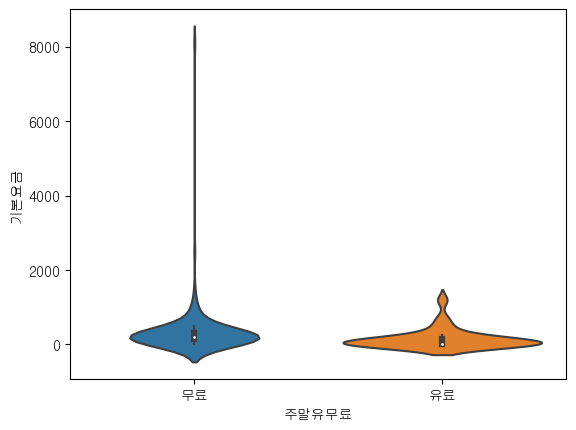

In [170]:
sns.violinplot(x = tmp['주말유무료'], y = tmp['기본요금'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

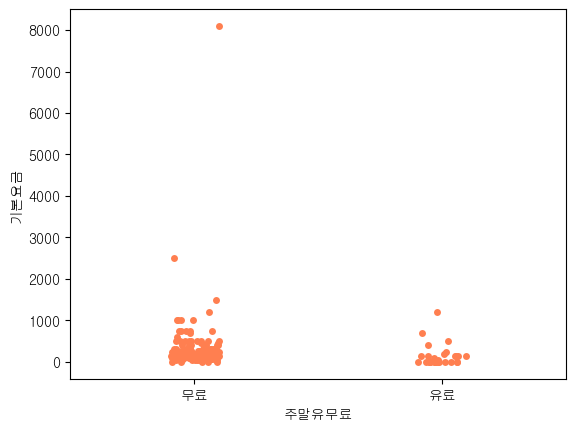

In [174]:
sns.stripplot(x = tmp['주말유무료'], y = tmp['기본요금'],color='coral')

In [176]:
tmp.columns

Index(['주차장명', '주차수', '유무료', '주말유무료', '공휴일유무료', '월정기권금액', '기본요금', '추가요금'], dtype='object')

In [179]:
tmp.set_index('주차장명', inplace = True)

In [182]:
test = tmp[['주차수', '기본요금', '추가요금']]

In [183]:
test.corr()

,주차수,기본요금,추가요금
주차수,1.000000,0.059378,-0.113195
기본요금,0.059378,1.000000,0.346360
추가요금,-0.113195,0.346360,1.000000


<Axes: >

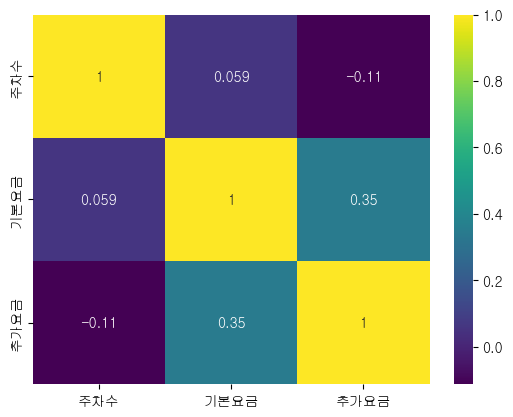

In [186]:
sns.heatmap(test.corr(), annot=True, cmap = 'viridis')

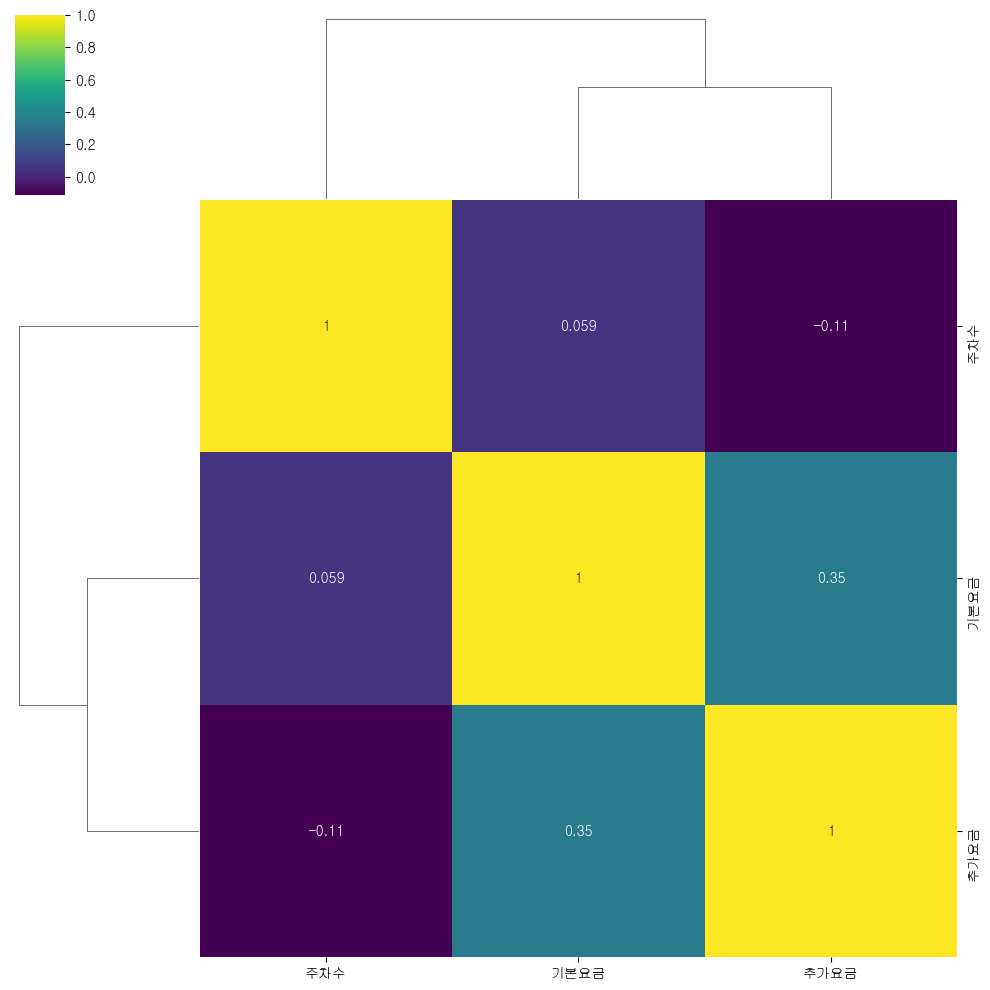

In [189]:
sns.clustermap(test.corr(),annot = True, cmap = 'viridis')

C:\Users\qkrdy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


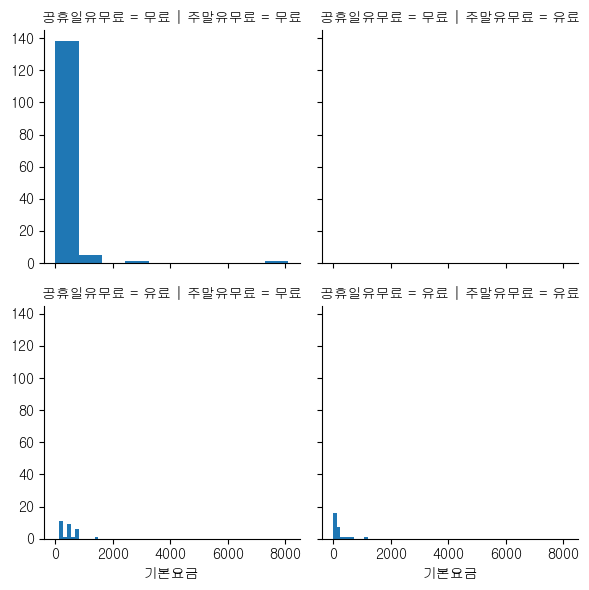

In [193]:
sns.FacetGrid(tmp, col = '주말유무료', row = '공휴일유무료').map(plt.hist, '기본요금')

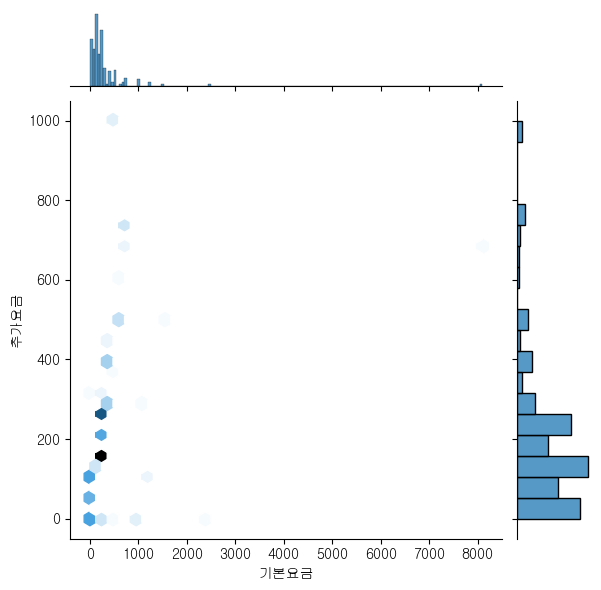

In [200]:
sns.jointplot(x = tmp['기본요금'], y = tmp['추가요금'], kind = 'hex')

<Axes: xlabel='기본요금', ylabel='추가요금'>

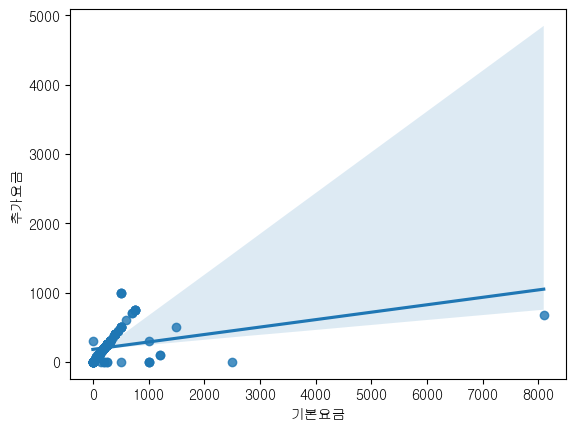

In [201]:
sns.regplot(x = '기본요금', y = '추가요금', data = tmp)

C:\Users\qkrdy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


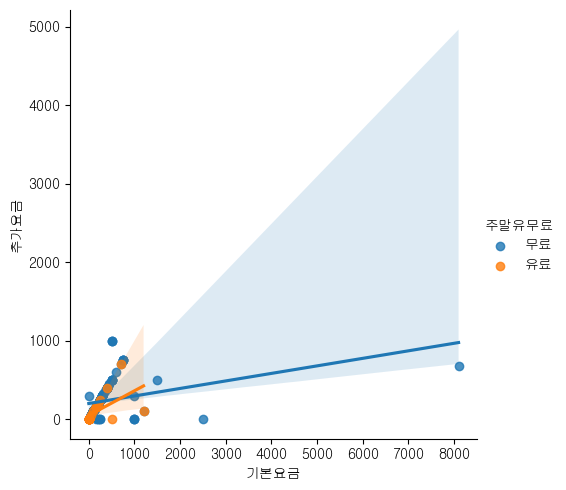

In [203]:
sns.lmplot(x = '기본요금', y = '추가요금', data = tmp, hue = '주말유무료')

C:\Users\qkrdy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


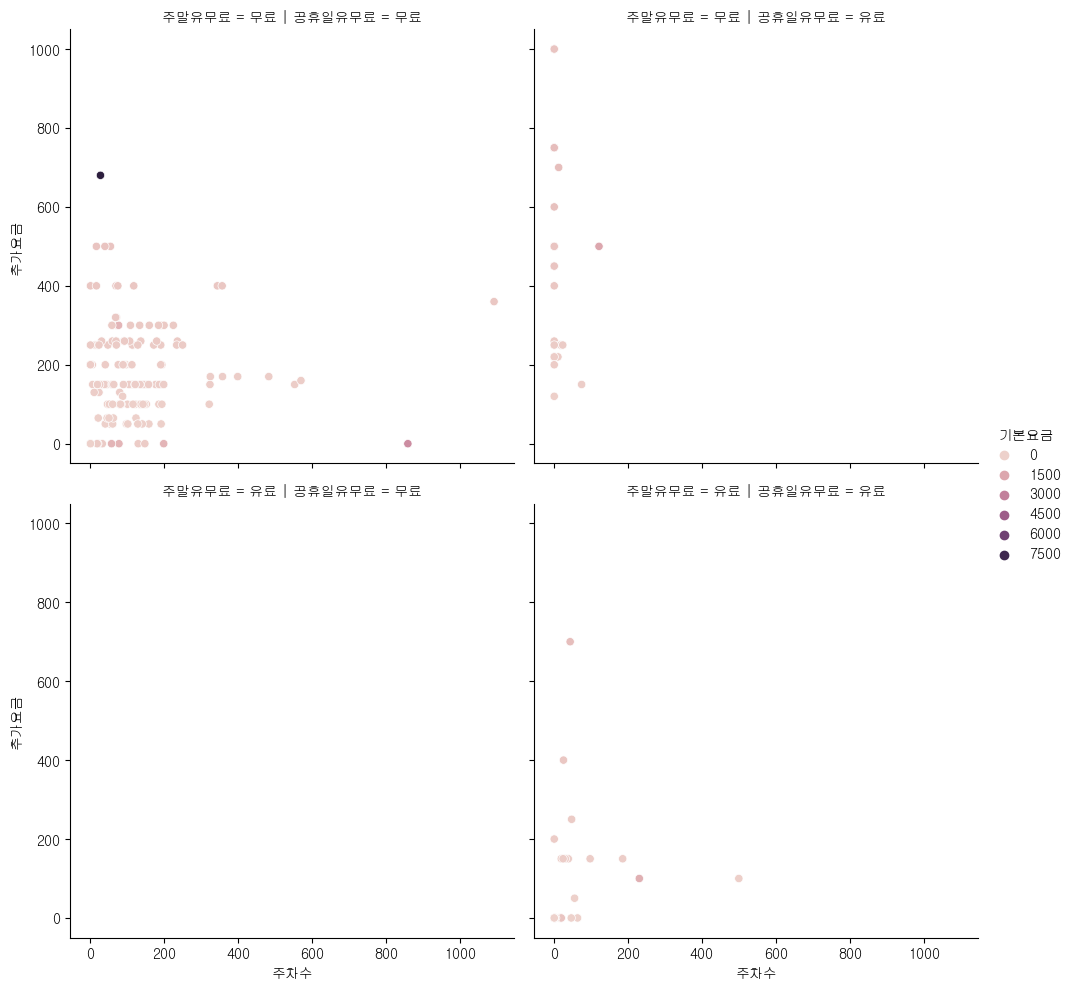

In [205]:
sns.relplot(x = '주차수', y = '추가요금', hue = '기본요금', row = '주말유무료', col = '공휴일유무료', data = tmp, )

In [206]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected = True)

In [207]:
url = "https://api.upbit.com/v1/candles/days"
coin_lst = ['KRW-BTC','KRW-ETH','KRW-XRP']
headers = {"Accept": "application/json"}
df = pd.DataFrame()
for c in coin_lst:
    querystring = {"market":c, "count":"200"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    df = pd.concat([df,pd.DataFrame(response.json())])

In [208]:
df

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-BTC,2023-12-28T00:00:00,2023-12-28T09:00:00,57920000.0,58468000.0,57474000.0,57741000.0,1703736641087,5.494895e+10,9.496127e+02,57920000.0,-179000.0,-0.003090
1,KRW-BTC,2023-12-27T00:00:00,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,1703721598803,2.270096e+11,3.965843e+03,57032000.0,888000.0,0.015570
2,KRW-BTC,2023-12-26T00:00:00,2023-12-26T09:00:00,58042000.0,58140000.0,56349000.0,57032000.0,1703635199803,2.708228e+11,4.735230e+03,58042000.0,-1010000.0,-0.017401
3,KRW-BTC,2023-12-25T00:00:00,2023-12-25T09:00:00,58002000.0,58659000.0,57464000.0,58042000.0,1703548799890,2.721330e+11,4.687209e+03,58002000.0,40000.0,0.000690
4,KRW-BTC,2023-12-24T00:00:00,2023-12-24T09:00:00,59249000.0,59600000.0,58000000.0,58002000.0,1703462399990,2.200170e+11,3.729334e+03,59250000.0,-1248000.0,-0.021063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,KRW-XRP,2023-06-16T00:00:00,2023-06-16T09:00:00,627.0,630.0,602.0,624.0,1686959997094,1.610391e+11,2.616515e+08,627.0,-3.0,-0.004785
196,KRW-XRP,2023-06-15T00:00:00,2023-06-15T09:00:00,630.0,638.0,612.0,627.0,1686873599460,1.663204e+11,2.660830e+08,631.0,-4.0,-0.006339
197,KRW-XRP,2023-06-14T00:00:00,2023-06-14T09:00:00,678.0,681.0,609.0,631.0,1686787200001,2.592919e+11,3.998507e+08,679.0,-48.0,-0.070692
198,KRW-XRP,2023-06-13T00:00:00,2023-06-13T09:00:00,689.0,735.0,664.0,679.0,1686700799794,4.851964e+11,6.910409e+08,689.0,-10.0,-0.014514


In [239]:
my_df = df[['market','candle_date_time_kst','opening_price','high_price',
            'low_price','trade_price','candle_acc_trade_price','candle_acc_trade_volume']].copy()
my_df

,market,candle_date_time_kst,opening_price,high_price,low_price,trade_price,candle_acc_trade_price,candle_acc_trade_volume
0,KRW-BTC,2023-12-28T09:00:00,57920000.0,58468000.0,57474000.0,57741000.0,5.494895e+10,9.496127e+02
1,KRW-BTC,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,2.270096e+11,3.965843e+03
2,KRW-BTC,2023-12-26T09:00:00,58042000.0,58140000.0,56349000.0,57032000.0,2.708228e+11,4.735230e+03
3,KRW-BTC,2023-12-25T09:00:00,58002000.0,58659000.0,57464000.0,58042000.0,2.721330e+11,4.687209e+03
4,KRW-BTC,2023-12-24T09:00:00,59249000.0,59600000.0,58000000.0,58002000.0,2.200170e+11,3.729334e+03
...,...,...,...,...,...,...,...,...
195,KRW-XRP,2023-06-16T09:00:00,627.0,630.0,602.0,624.0,1.610391e+11,2.616515e+08
196,KRW-XRP,2023-06-15T09:00:00,630.0,638.0,612.0,627.0,1.663204e+11,2.660830e+08
197,KRW-XRP,2023-06-14T09:00:00,678.0,681.0,609.0,631.0,2.592919e+11,3.998507e+08
198,KRW-XRP,2023-06-13T09:00:00,689.0,735.0,664.0,679.0,4.851964e+11,6.910409e+08


# 첫번째 전처리 - market에서 코인의 이름만 남기기

# 두번째 전처리 - candle_date_time_kst 날짜만 남기기

In [244]:
my_df['market'] = my_df['market'].str.replace('KRW-', '')
my_df['candle_date_time_kst'] = my_df['candle_date_time_kst'].str.replace('T09:00:00', '')

In [245]:
my_df

,market,candle_date_time_kst,opening_price,high_price,low_price,trade_price,candle_acc_trade_price,candle_acc_trade_volume
0,BTC,2023-12-28,57920000.0,58468000.0,57474000.0,57741000.0,5.494895e+10,9.496127e+02
1,BTC,2023-12-27,57032000.0,58212000.0,56349000.0,57920000.0,2.270096e+11,3.965843e+03
2,BTC,2023-12-26,58042000.0,58140000.0,56349000.0,57032000.0,2.708228e+11,4.735230e+03
3,BTC,2023-12-25,58002000.0,58659000.0,57464000.0,58042000.0,2.721330e+11,4.687209e+03
4,BTC,2023-12-24,59249000.0,59600000.0,58000000.0,58002000.0,2.200170e+11,3.729334e+03
...,...,...,...,...,...,...,...,...
195,XRP,2023-06-16,627.0,630.0,602.0,624.0,1.610391e+11,2.616515e+08
196,XRP,2023-06-15,630.0,638.0,612.0,627.0,1.663204e+11,2.660830e+08
197,XRP,2023-06-14,678.0,681.0,609.0,631.0,2.592919e+11,3.998507e+08
198,XRP,2023-06-13,689.0,735.0,664.0,679.0,4.851964e+11,6.910409e+08


In [246]:
help(plotly.offline.iplot)

Help on function iplot in module plotly.offline.offline:

iplot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, image=None, filename='plot_image', image_width=800, image_height=600, config=None, auto_play=True, animation_opts=None)
    Draw plotly graphs inside an IPython or Jupyter notebook
    
    figure_or_data -- a plotly.graph_objs.Figure or plotly.graph_objs.Data or
                      dict or list that describes a Plotly graph.
                      See https://plot.ly/python/ for examples of
                      graph descriptions.
    
    Keyword arguments:
    show_link (default=False) -- display a link in the bottom-right corner of
                                of the chart that will export the chart to
                                Plotly Cloud or Plotly Enterprise
    link_text (default='Export to plot.ly') -- the text of export link
    validate (default=True) -- validate that all of the keys in the figure
                          

In [247]:
import plotly.express as px

In [249]:
plotly.offline.iplot({
    "data" : [go.Scatter(x = [1, 2, 3, 4], y = [4, 3, 2, 1])],
    "layout" : go.Layout(title = "hello world")
})

In [250]:
fig = px.scatter(my_df[my_df.market == 'BTC'],
                 x = 'candle_date_time_kst',
                 y = 'trade_price')
fig.show()

In [252]:
fig = px.bar(my_df[my_df.market == 'BTC'][-10:],
                 x = 'candle_date_time_kst',
                 y = 'trade_price')
fig.show()

In [254]:
fig = px.line(my_df[my_df.market == 'ETH'],
                 x = 'candle_date_time_kst',
                 y = 'trade_price')
fig.show()

# 산점도 그래프 - scatter

# ChampionName을 기준 평균내기

# x값은 딜량, y값은 받은데미지

# color = 'ChampionName'

# plotly제작

In [256]:
tmp_df = lol_df[['championName','totalDamageDealtToChampions','totalDamageTaken']]

In [284]:
tmp_df

,championName,totalDamageDealtToChampions,totalDamageTaken
0,Poppy,16199,12908
1,Viego,12057,16026
2,Azir,11248,11933
3,Xayah,12248,6739
4,Rell,4006,9176
...,...,...,...
36907,Volibear,36682,37838
36908,Nasus,21433,37546
36909,Irelia,33104,33816
36910,Belveth,49250,27412


In [262]:
tmp_lol = tmp_df.groupby('championName').mean().round()

In [280]:
tmp_lol = tmp_lol.reset_index('championName')

In [281]:
tmp_lol

,championName,totalDamageDealtToChampions,totalDamageTaken
0,Aatrox,20964.0,32671.0
1,Ahri,18828.0,19367.0
2,Akali,21848.0,25682.0
3,Akshan,23426.0,19801.0
4,Alistar,11304.0,30499.0
...,...,...,...
161,Zeri,22739.0,20042.0
162,Ziggs,25129.0,16031.0
163,Zilean,9183.0,15796.0
164,Zoe,22752.0,17401.0


In [289]:
fig = px.scatter(tmp_lol,
                 x = 'totalDamageDealtToChampions',
                 y = 'totalDamageTaken',
                color = 'championName')
fig.show()

# 챔피언 시너지 또는 2:2구도 분석

- blue팀 정글포지션인 사람들만 꺼내서 [GAMEID,CHAMPIONNAME,WIN].RENAME(CHAMPIONID -> j_champ) (테이블 이름 - blue_jungle)
- blue팀 탑포지션인 사람들만 꺼내서 [GAMEID,CHAMPIONNAME,WIN].RENAME(CHAMPIONID -> t_champ) (테이블 이름 - blue_top)
- blue팀끼리 merge 

- red 동일하게 정글, 탑 뽑아내서 merge


- blue팀과 red팀의 데이터를 merge하기 위해서 enemy_blue / enemy_red 라는 데이터프레임 제작 
- 이후 championName들을 rename을 통해 각각 enemy_j_champ_cham enemy_t_champ으로 변환


- blue팀입장에서 red팀의 데이터 merge
- red 팀 입장에서 blue팀 데이터 merge

- 위에서 만들어진 merge테이블을 concat을 이용해서 하나의 데이터 테이블로 만들기
- games와 win의 횟수를 구하고 win_rate(승률) 컬럼을 추가한 result 테이블 

In [291]:
lol_df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [319]:
blue_df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25
1,KR_6622380599,1104,13.14.522.7601,제이를 좋아해요,93,2,Viego,8808,JUNGLE,100,...,7449,8106,9034,9252,0,0,0,0,0,0
11,KR_6624359428,1742,13.14.522.7601,우 울,49,2,LeeSin,14304,JUNGLE,100,...,7049,7342,7552,7680,8061,9334,9675,9912,10702,10845
21,KR_6624429645,1770,13.14.522.7601,M1anhua,158,2,JarvanIV,11254,JUNGLE,100,...,5608,5988,6576,7080,7222,7514,7731,7889,8363,8667
31,KR_6630380523,1164,13.15.523.2423,짜히 견,74,2,Nidalee,8649,JUNGLE,100,...,7015,7532,7939,8161,8338,0,0,0,0,0
41,KR_6630417447,1623,13.15.523.2423,버츄얼 아이코,340,2,JarvanIV,12158,JUNGLE,100,...,6275,6626,7156,7890,8240,8553,8799,9221,9842,10075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36831,KR_6871449527,1344,13.24.547.9214,전역하면25살,113,2,LeeSin,12534,JUNGLE,100,...,8912,9444,9714,10330,11166,11743,12588,12894,0,0
36841,KR_6871456917,1434,13.24.547.9214,간절하면닷지해,126,2,Maokai,9121,JUNGLE,100,...,4878,5297,5881,6232,6549,6671,6851,7360,7791,0
36851,KR_6871460455,1803,13.24.547.9214,서공삼,160,2,LeeSin,14288,JUNGLE,100,...,6072,6598,7035,7162,7588,7979,8151,8577,9538,9814
36885,KR_6871482544,1509,13.24.547.9214,Sionen,774,2,Graves,10550,JUNGLE,100,...,4966,5416,5647,5995,6287,6858,7147,7721,7843,8616


In [439]:
blue_df = lol_df[lol_df.teamId == 100]

In [440]:
blue_jg = blue_df[blue_df.teamPosition == 'JUNGLE']

In [441]:
blue_jg = blue_jg[['gameId', 'championName', 'win']]

In [442]:
blue_jg.columns = ('gameId', 'j_champ', 'win')

In [443]:
blue_top = blue_df[blue_df.teamPosition == 'TOP']

In [444]:
blue_top = blue_top[['gameId', 'championName']]

In [445]:
blue_top.columns = ('gameId', 't_champ')

In [446]:
blue_merge = blue_top.merge(blue_jg, on = 'gameId')

In [361]:
blue_merge

,gameId,t_champ,j_champ,win
0,KR_6622380599,Poppy,Viego,True
1,KR_6624359428,Aatrox,LeeSin,True
2,KR_6624429645,Yone,JarvanIV,False
3,KR_6630380523,Riven,Nidalee,True
4,KR_6630417447,Gwen,JarvanIV,True
...,...,...,...,...
3367,KR_6871449527,Shen,LeeSin,True
3368,KR_6871456917,Jax,Maokai,False
3369,KR_6871460455,Udyr,LeeSin,False
3370,KR_6871482544,Rengar,Graves,False


In [429]:
red_df = lol_df[lol_df.teamId == 200]

In [430]:
red_jg = red_df[red_df.teamPosition == 'JUNGLE']

In [431]:
red_jg = red_jg[['gameId', 'championName', 'win']]

In [432]:
red_jg.columns = ('gameId', 'enemy_j_champ', 'win')

In [433]:
red_top = red_df[red_df.teamPosition == 'TOP']

In [434]:
red_top = red_top[['gameId', 'championName']]

In [435]:
red_top.columns = ('gameId', 'enemy_t_champ')

In [436]:
red_merge = red_top.merge(red_jg, on = 'gameId')

In [437]:
red_merge.drop('win', axis = 1, inplace=True)

In [438]:
blue_lol_merge = blue_merge.merge(red_merge, on = 'gameId')

In [467]:
blue_lol_merge.columns = ('gameId', 't_champ', 'j_champ', 'win', 'enemy_t_champ', 'enemy_j_champ')

In [449]:
blue_lol_merge

,gameId,t_champ,j_champ,win,enemy_t_champ,enemy_j_champ_y
0,KR_6622380599,Poppy,Viego,True,Aatrox,LeeSin
1,KR_6624359428,Aatrox,LeeSin,True,Fiora,Khazix
2,KR_6624429645,Yone,JarvanIV,False,Gnar,Elise
3,KR_6630380523,Riven,Nidalee,True,Irelia,Belveth
4,KR_6630417447,Gwen,JarvanIV,True,Aatrox,Sylas
...,...,...,...,...,...,...
3367,KR_6871449527,Shen,LeeSin,True,Jayce,Graves
3368,KR_6871456917,Jax,Maokai,False,Quinn,Talon
3369,KR_6871460455,Udyr,LeeSin,False,Rengar,Graves
3370,KR_6871482544,Rengar,Graves,False,TahmKench,Viego


In [362]:
blue_jg2 = blue_jg.columns = ('gameId', 'enemy_j_champ', 'win')

In [363]:
blue_top2 = blue_df[blue_df.teamPosition == 'TOP']

In [367]:
blue_top2 = blue_top[['gameId', 't_champ']]

In [370]:
blue_top2.columns = ('gameId', 'emeny_t_champ')

In [372]:
blue_merge2 = blue_top.merge(blue_jg, on = 'gameId')

In [374]:
blue_merge2.drop('win', axis = 1, inplace=True)

In [375]:
blue_merge2

,gameId,emeny_t_champ,enemy_j_champ
0,KR_6622380599,Poppy,Viego
1,KR_6624359428,Aatrox,LeeSin
2,KR_6624429645,Yone,JarvanIV
3,KR_6630380523,Riven,Nidalee
4,KR_6630417447,Gwen,JarvanIV
...,...,...,...
3367,KR_6871449527,Shen,LeeSin
3368,KR_6871456917,Jax,Maokai
3369,KR_6871460455,Udyr,LeeSin
3370,KR_6871482544,Rengar,Graves


In [376]:
red_df2 = lol_df[lol_df.teamId == 200]

In [377]:
red_jg2 = red_df2[red_df.teamPosition == 'JUNGLE']

In [402]:
red_jg2.columns = ('gameId', 'j_champ', 'win')

In [403]:
red_jg2

,gameId,g_champ,win
6,KR_6622380599,LeeSin,False
16,KR_6624359428,Khazix,False
26,KR_6624429645,Elise,True
36,KR_6630380523,Belveth,False
46,KR_6630417447,Sylas,False
...,...,...,...
36836,KR_6871449527,Graves,False
36846,KR_6871456917,Talon,True
36856,KR_6871460455,Graves,True
36890,KR_6871482544,Viego,True


In [379]:
red_jg2 = red_jg2[['gameId', 'championName', 'win']]

In [381]:
red_top2 = red_df2[red_df2.teamPosition == 'TOP']

In [396]:
red_top2.columns = ('gameId', 't_champ')

In [397]:
red_top2

,gameId,t_champ
5,KR_6622380599,Aatrox
15,KR_6624359428,Fiora
25,KR_6624429645,Gnar
35,KR_6630380523,Irelia
45,KR_6630417447,Aatrox
...,...,...
36835,KR_6871449527,Jayce
36845,KR_6871456917,Quinn
36855,KR_6871460455,Rengar
36889,KR_6871482544,TahmKench


In [404]:
red_merge2 = red_top2.merge(red_jg2, on = 'gameId')

In [385]:
red_merge2.columns = ('gameId', 't_champ', 'win', 'j_champ')

In [387]:
red_merge2.drop('wiii', axis = 1, inplace=True)

In [528]:
red_merge2

,gameId,t_champ,g_champ,win
0,KR_6622380599,Aatrox,LeeSin,False
1,KR_6624359428,Fiora,Khazix,False
2,KR_6624429645,Gnar,Elise,True
3,KR_6630380523,Irelia,Belveth,False
4,KR_6630417447,Aatrox,Sylas,False
...,...,...,...,...
3367,KR_6871449527,Jayce,Graves,False
3368,KR_6871456917,Quinn,Talon,True
3369,KR_6871460455,Rengar,Graves,True
3370,KR_6871482544,TahmKench,Viego,True


In [426]:
red_lol_merge = red_merge2.merge(blue_merge2, on = 'gameId')

In [478]:
red_lol_merge.columns = ('gameId', 't_champ', 'j_champ', 'win', 'enemy_t_champ', 'enemy_j_champ')

In [479]:
red_lol_merge

,gameId,t_champ,j_champ,win,enemy_t_champ,enemy_j_champ
0,KR_6622380599,Aatrox,LeeSin,False,Poppy,Viego
1,KR_6624359428,Fiora,Khazix,False,Aatrox,LeeSin
2,KR_6624429645,Gnar,Elise,True,Yone,JarvanIV
3,KR_6630380523,Irelia,Belveth,False,Riven,Nidalee
4,KR_6630417447,Aatrox,Sylas,False,Gwen,JarvanIV
...,...,...,...,...,...,...
3367,KR_6871449527,Jayce,Graves,False,Shen,LeeSin
3368,KR_6871456917,Quinn,Talon,True,Jax,Maokai
3369,KR_6871460455,Rengar,Graves,True,Udyr,LeeSin
3370,KR_6871482544,TahmKench,Viego,True,Rengar,Graves


In [468]:
blue_lol_merge

,gameId,t_champ,j_champ,win,enemy_t_champ,enemy_j_champ
0,KR_6622380599,Poppy,Viego,True,Aatrox,LeeSin
1,KR_6624359428,Aatrox,LeeSin,True,Fiora,Khazix
2,KR_6624429645,Yone,JarvanIV,False,Gnar,Elise
3,KR_6630380523,Riven,Nidalee,True,Irelia,Belveth
4,KR_6630417447,Gwen,JarvanIV,True,Aatrox,Sylas
...,...,...,...,...,...,...
3367,KR_6871449527,Shen,LeeSin,True,Jayce,Graves
3368,KR_6871456917,Jax,Maokai,False,Quinn,Talon
3369,KR_6871460455,Udyr,LeeSin,False,Rengar,Graves
3370,KR_6871482544,Rengar,Graves,False,TahmKench,Viego


In [492]:
lol_concat = pd.concat([blue_lol_merge, red_lol_merge], axis = 0)

In [482]:
lol_concat.drop('gameId', axis = 1, inplace=True)

In [493]:
lol_concat = lol_concat[['t_champ', 'j_champ', 'enemy_t_champ', 'enemy_j_champ', 'win']]

In [494]:
lol_concat['win'] = lol_concat.apply(lambda x : 1 if x.win == 'True' else 0, axis = 1)

In [496]:
cnt = lol_concat[['t_champ', 'j_champ', 'enemy_t_champ', 'enemy_j_champ', 'win']].groupby(['t_champ', 'j_champ', 'enemy_t_champ', 'enemy_j_champ']).count()

In [504]:
cnt.sort_values(by = 'cnt', ascending=False)

cnt
t_champ j_champ enemy_t_champ enemy_j_champ     
Aatrox  LeeSin  Jax           Belveth          3
Jax     Belveth Aatrox        LeeSin           3
Darius  Graves  Aatrox        Evelynn          2
KSante  LeeSin  Trundle       Graves           2
Poppy   Graves  Trundle       Ekko             2
...                                          ...
Irelia  LeeSin  Rumble        XinZhao          1
                Riven         Graves           1
                Renekton      Elise            1
                Kled          Sylas            1
Zilean  Zac     Kennen        Viego            1

[6680 rows x 1 columns]

In [503]:
cnt = cnt.rename(columns =  {'win' : 'cnt'})

In [505]:
win_cnt = lol_concat[['t_champ', 'j_champ', 'enemy_t_champ', 'enemy_j_champ', 'win']].groupby(['t_champ', 'j_champ', 'enemy_t_champ', 'enemy_j_champ']).sum()

In [509]:
win_cnt.sort_values(by = 'win_cnt', ascending=False)

win_cnt
t_champ j_champ enemy_t_champ enemy_j_champ         
Aatrox  LeeSin  Jax           Belveth              2
        Nidalee Jax           LeeSin               2
        LeeSin  Yone          FiddleSticks         2
Trundle Nidalee Jax           LeeSin               2
Garen   Graves  Yone          LeeSin               2
...                                              ...
Jayce   Shaco   Jax           Briar                0
                Malphite      Nocturne             0
        Sylas   Gangplank     Evelynn              0
                Tryndamere    Ivern                0
Zilean  Zac     Kennen        Viego                0

[6680 rows x 1 columns]

In [507]:
win_cnt = win_cnt.rename(columns =  {'win' : 'win_cnt'})

In [584]:
result = cnt.join(win_cnt)

In [586]:
result.sort_values(by = 'cnt', ascending=False)

cnt  win_cnt  win_rate
t_champ j_champ enemy_t_champ enemy_j_champ                        
Aatrox  LeeSin  Jax           Belveth          3        2       0.7
Jax     Belveth Aatrox        LeeSin           3        1       0.3
Darius  Graves  Aatrox        Evelynn          2        1       0.5
KSante  LeeSin  Trundle       Graves           2        2       1.0
Poppy   Graves  Trundle       Ekko             2        2       1.0
...                                          ...      ...       ...
Irelia  LeeSin  Rumble        XinZhao          1        1       1.0
                Riven         Graves           1        1       1.0
                Renekton      Elise            1        1       1.0
                Kled          Sylas            1        0       0.0
Zilean  Zac     Kennen        Viego            1        0       0.0

[6680 rows x 3 columns]

In [585]:
result['win_rate']= result.apply(win_rate, axis = 1)

In [583]:
def win_rate(x):
    if x.cnt == 0:
        return 0
    else:
        rate = round(x.win_cnt / x.cnt, 1)
        return rate